In [95]:
import requests

In [96]:
import json

In [97]:
import pandas as pd

In [98]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [99]:
import math

In [100]:
import statistics

In [101]:
#Saving of Irish data
irel_url = "https://api.covid19api.com/country/ireland/status/confirmed?from=2020-09-01T00:00:00Z&to=2020-10-01T00:00:00Z"
irel_data_raw = requests.get(irel_url)

print(irel_data_raw.status_code)

#saving the Irish covid data to a json file
ireland_covid_file = open("ireland.json", "w")
ireland_covid_file.write(irel_data_raw.text)
ireland_covid_file.close()

200


In [102]:
#Saving of Swedish data
swed_url = "https://api.covid19api.com/country/sweden/status/confirmed?from=2020-09-01T00:00:00Z&to=2020-10-01T00:00:00Z"
swed_data_raw = requests.get(swed_url)

print(swed_data_raw.status_code)

#saving the Swedish covid data to a json file
sweden_covid_file = open("sweden.json", "w")
sweden_covid_file.write(swed_data_raw.text)
sweden_covid_file.close()

200


In [103]:
#Saving of Croatian data
cro_url = "https://api.covid19api.com/country/croatia/status/confirmed?from=2020-09-01T00:00:00Z&to=2020-10-01T00:00:00Z"
cro_data_raw = requests.get(cro_url)

print(cro_data_raw.status_code)

#saving the Swedish covid data to a json file
cro_covid_file = open("croatia.json", "w")
cro_covid_file.write(cro_data_raw.text)
cro_covid_file.close()

200


In [104]:
#Loading the Irish and Swedish datasets
load_ire= open("ireland.json",)
irish_data=json.load(load_ire)
load_ire.close()

load_swe= open("sweden.json",)
swedish_data= json.load(load_swe)
load_swe.close()

load_cro= open("croatia.json",)
croatian_data= json.load(load_cro)
load_cro.close()

type(swedish_data)

list

In [105]:
#Applying Pandas to prepare show loaded data
irish_table= pd.DataFrame(irish_data)
swedish_table= pd.DataFrame(swedish_data)
croatian_table= pd.DataFrame(croatian_data)


print("Irish Data")
irish_table

Irish Data


,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Ireland,IE,,,,53.41,-8.24,29025,confirmed,2020-09-01T00:00:00Z
1,Ireland,IE,,,,53.41,-8.24,29114,confirmed,2020-09-02T00:00:00Z
2,Ireland,IE,,,,53.41,-8.24,29206,confirmed,2020-09-03T00:00:00Z
3,Ireland,IE,,,,53.41,-8.24,29303,confirmed,2020-09-04T00:00:00Z
4,Ireland,IE,,,,53.41,-8.24,29534,confirmed,2020-09-05T00:00:00Z
5,Ireland,IE,,,,53.41,-8.24,29672,confirmed,2020-09-06T00:00:00Z
6,Ireland,IE,,,,53.41,-8.24,29774,confirmed,2020-09-07T00:00:00Z
7,Ireland,IE,,,,53.41,-8.24,30080,confirmed,2020-09-08T00:00:00Z
8,Ireland,IE,,,,53.41,-8.24,30164,confirmed,2020-09-09T00:00:00Z
9,Ireland,IE,,,,53.41,-8.24,30360,confirmed,2020-09-10T00:00:00Z


In [106]:
print("Swedish Data")
swedish_table

Swedish Data


,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Sweden,SE,,,,60.13,18.64,84521,confirmed,2020-09-01T00:00:00Z
1,Sweden,SE,,,,60.13,18.64,84532,confirmed,2020-09-02T00:00:00Z
2,Sweden,SE,,,,60.13,18.64,84729,confirmed,2020-09-03T00:00:00Z
3,Sweden,SE,,,,60.13,18.64,84985,confirmed,2020-09-04T00:00:00Z
4,Sweden,SE,,,,60.13,18.64,84985,confirmed,2020-09-05T00:00:00Z
5,Sweden,SE,,,,60.13,18.64,84985,confirmed,2020-09-06T00:00:00Z
6,Sweden,SE,,,,60.13,18.64,85558,confirmed,2020-09-07T00:00:00Z
7,Sweden,SE,,,,60.13,18.64,85707,confirmed,2020-09-08T00:00:00Z
8,Sweden,SE,,,,60.13,18.64,85880,confirmed,2020-09-09T00:00:00Z
9,Sweden,SE,,,,60.13,18.64,86194,confirmed,2020-09-10T00:00:00Z


In [107]:
croatian_table

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Croatia,HR,,,,45.1,15.2,10414,confirmed,2020-09-01T00:00:00Z
1,Croatia,HR,,,,45.1,15.2,10725,confirmed,2020-09-02T00:00:00Z
2,Croatia,HR,,,,45.1,15.2,11094,confirmed,2020-09-03T00:00:00Z
3,Croatia,HR,,,,45.1,15.2,11428,confirmed,2020-09-04T00:00:00Z
4,Croatia,HR,,,,45.1,15.2,11739,confirmed,2020-09-05T00:00:00Z
5,Croatia,HR,,,,45.1,15.2,11964,confirmed,2020-09-06T00:00:00Z
6,Croatia,HR,,,,45.1,15.2,12081,confirmed,2020-09-07T00:00:00Z
7,Croatia,HR,,,,45.1,15.2,12285,confirmed,2020-09-08T00:00:00Z
8,Croatia,HR,,,,45.1,15.2,12626,confirmed,2020-09-09T00:00:00Z
9,Croatia,HR,,,,45.1,15.2,12917,confirmed,2020-09-10T00:00:00Z


In [108]:
#Function to remove unused and useless columns
def removeUnused(data):
    for day in data:
         del day["Province"]
         del day["City"]
         del day["CityCode"]
         del day["CountryCode"]
         del day["Lat"]
         del day["Lon"]
         del day["Status"]
        

In [109]:
#Function to display the dates in a tidier manner
def dateCorrector(date):
    new_date=date[0:10]
    return new_date
    

In [110]:
#Here we will remove unused columns
removeUnused(irish_data)
removeUnused(swedish_data)
removeUnused(croatian_data)

In [111]:
#Tidying up of dates
for day in irish_data:
    day["Date"]=dateCorrector(day["Date"])
    
for day in swedish_data:
    day["Date"]=dateCorrector(day["Date"])
    
for day in croatian_data:
    day["Date"]=dateCorrector(day["Date"])
    

In [112]:
clean_irish_table = pd.DataFrame(irish_data)
print("Tidied up Irish Data")
clean_irish_table

Tidied up Irish Data


,Country,Cases,Date
0,Ireland,29025,2020-09-01
1,Ireland,29114,2020-09-02
2,Ireland,29206,2020-09-03
3,Ireland,29303,2020-09-04
4,Ireland,29534,2020-09-05
5,Ireland,29672,2020-09-06
6,Ireland,29774,2020-09-07
7,Ireland,30080,2020-09-08
8,Ireland,30164,2020-09-09
9,Ireland,30360,2020-09-10


In [113]:
clean_swedish_table = pd.DataFrame(swedish_data)
print("Tidied up Swedish Data")
clean_swedish_table

Tidied up Swedish Data


,Country,Cases,Date
0,Sweden,84521,2020-09-01
1,Sweden,84532,2020-09-02
2,Sweden,84729,2020-09-03
3,Sweden,84985,2020-09-04
4,Sweden,84985,2020-09-05
5,Sweden,84985,2020-09-06
6,Sweden,85558,2020-09-07
7,Sweden,85707,2020-09-08
8,Sweden,85880,2020-09-09
9,Sweden,86194,2020-09-10


In [114]:
clean_croatian_table = pd.DataFrame(croatian_data)
print("Tidied up Croatian Data")
clean_croatian_table 

Tidied up Croatian Data


,Country,Cases,Date
0,Croatia,10414,2020-09-01
1,Croatia,10725,2020-09-02
2,Croatia,11094,2020-09-03
3,Croatia,11428,2020-09-04
4,Croatia,11739,2020-09-05
5,Croatia,11964,2020-09-06
6,Croatia,12081,2020-09-07
7,Croatia,12285,2020-09-08
8,Croatia,12626,2020-09-09
9,Croatia,12917,2020-09-10


In [115]:
#Function to convert cases to type int
def intConversion(x):
    return int(x)
    

In [116]:
#Conversion of cases data to type interger from string
for day in irish_data:
    day["Cases"]= intConversion(day["Cases"])
    
for day in swedish_data:
    day["Cases"]= intConversion(day["Cases"])
    
for day in croatian_data:
    day["Cases"]= intConversion(day["Cases"])

In [117]:
#Splitting up the data in to seperate lists for visualization 

irish_cases=[]
irish_dates=[]

swedish_cases=[]
swedish_dates=[]

croatian_cases=[]
croatian_dates=[]

for day in irish_data:
    irish_cases.append(day["Cases"])

for day in irish_data:
    irish_dates.append(day["Date"])
    
for day in swedish_data:
    swedish_cases.append(day["Cases"])

for day in swedish_data:
    swedish_dates.append(day["Date"])
    
for day in croatian_data:
    croatian_cases.append(day["Cases"])

for day in croatian_data:
    croatian_dates.append(day["Date"])


In [118]:
def roundUp(x):
    return int(math.ceil(x / 10000.0)) * 10000

In [119]:
def roundDown(x):
    return int(math.floor(x / 10000.0)) * 10000

In [120]:
#Finding the max and mins of the data
max_irish_cases=max(irish_cases)
min_irish_cases=min(irish_cases)

max_swedish_cases=max(swedish_cases)
min_swedish_cases=min(swedish_cases)

max_croatian_cases=max(croatian_cases)
min_croatian_cases=min(croatian_cases)

upper_cases_limit=roundUp(max_swedish_cases)
lower_cases_limit=roundDown(min_croatian_cases)

In [121]:
#Averages
irish_average_cases = statistics.mean(irish_cases)
swedish_average_cases = statistics.mean(swedish_cases)
croatian_average_cases = statistics.mean(croatian_cases)

avg_cases=[irish_average_cases,swedish_average_cases,croatian_average_cases]
countries=[irish_data[0]["Country"],swedish_data[0]["Country"],croatian_data[0]["Country"]]
countries

['Ireland', 'Sweden', 'Croatia']

In [122]:
#This part is an analysis of the Irish Covid Statistics

In [123]:
#An important factor of the Irish Covid Statistics is that lockdown was implemented
#on the 21st of October for 6 weeks

#Retrieval of the list position of October 21st (in irish_cases[i] and irish_dates[i], i==i )

lockdown_int=0
for date in irish_dates:
    if date != "2020-09-21":
        lockdown_int=lockdown_int+1
    else:
        break



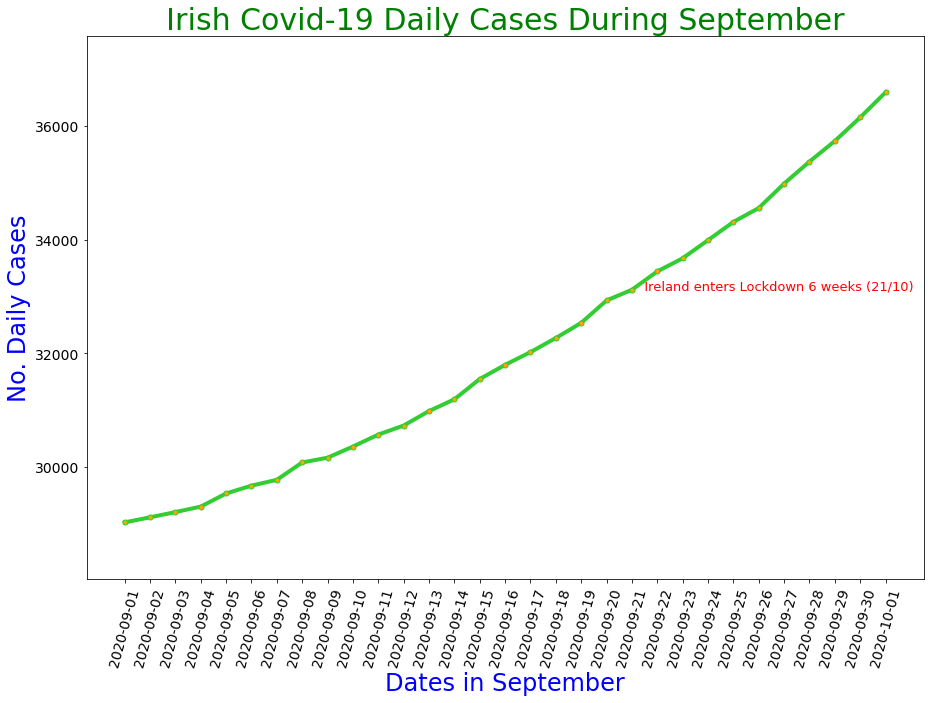

In [124]:
plt.figure(figsize=(15,10))
plt.plot(irish_dates,irish_cases, color= "limegreen", linewidth=4, marker="o", markersize=5, markerfacecolor="orange")
plt.title("Irish Covid-19 Daily Cases During September", fontsize=30, color="green")
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(min_irish_cases-1000,max_irish_cases+1000)
plt.xlabel('Dates in September', fontsize=24,color="blue")
plt.ylabel('No. Daily Cases', fontsize=24,color="blue")


# text is left-aligned
plt.text(irish_dates[lockdown_int],irish_cases[lockdown_int],"   Ireland enters Lockdown 6 weeks (21/10)",  fontsize=13, color="red")
plt.show()

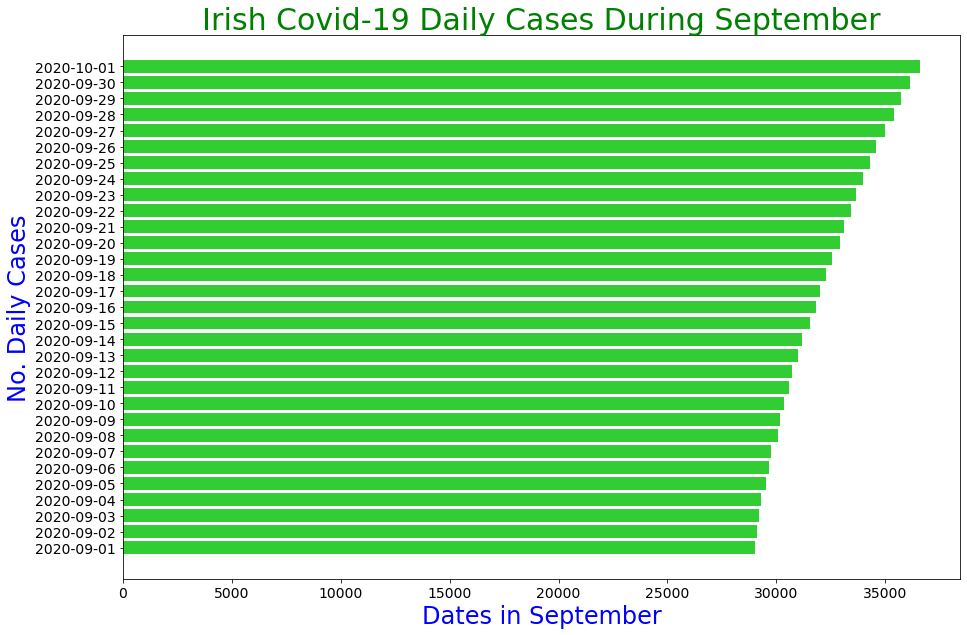

In [125]:
plt.figure(figsize=(15,10))
# set up the bar chart
plt.barh(irish_dates, irish_cases, align='center', color="limegreen")
plt.title("Irish Covid-19 Daily Cases During September", fontsize=30, color="green")
plt.xlabel('Dates in September', fontsize=24,color="blue")
plt.ylabel('No. Daily Cases', fontsize=24,color="blue")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.show()

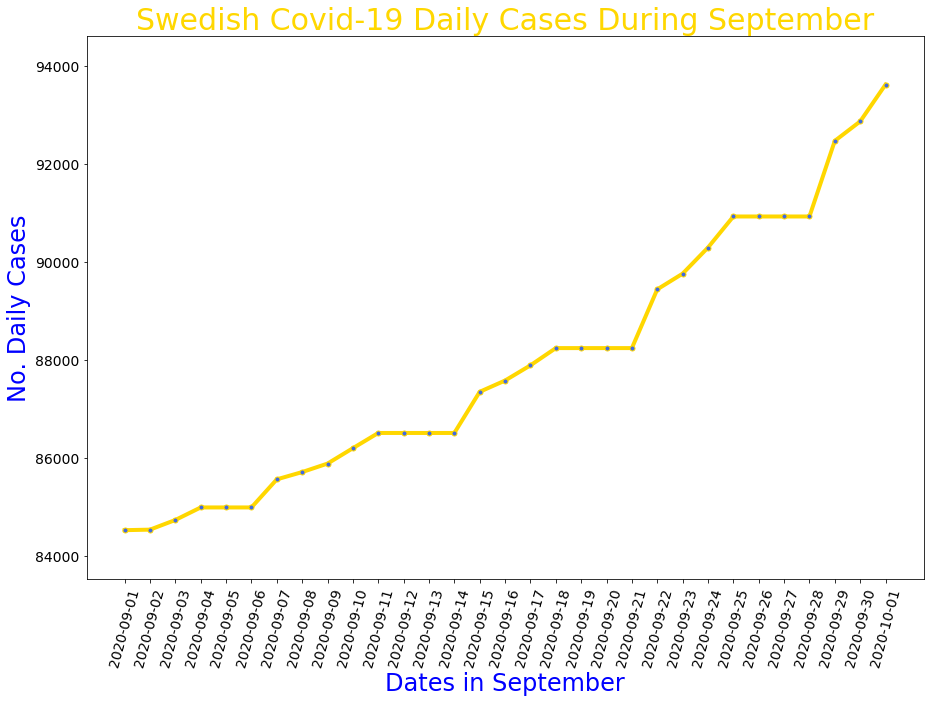

In [126]:
plt.figure(figsize=(15,10))
plt.plot(swedish_dates,swedish_cases,color= "gold", linewidth=4, marker="o", markersize=5, markerfacecolor="royalblue")
plt.title("Swedish Covid-19 Daily Cases During September", fontsize=30, color="gold")
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(min_swedish_cases-1000, max_swedish_cases+1000)
plt.xlabel('Dates in September', fontsize=24,color="blue")
plt.ylabel('No. Daily Cases', fontsize=24,color="blue")

plt.show()

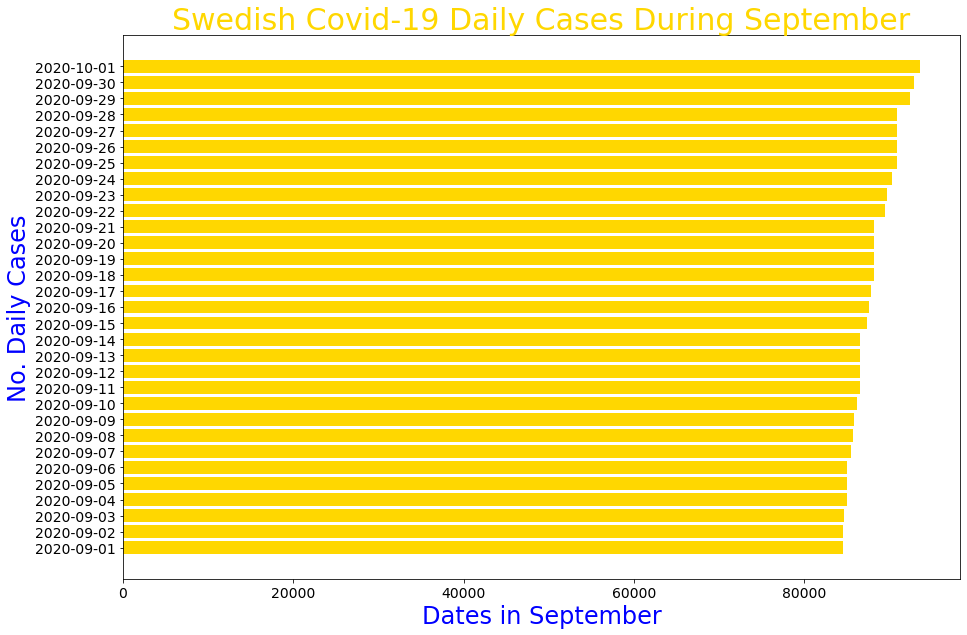

In [127]:
plt.figure(figsize=(15,10))
# set up the bar chart
plt.barh(swedish_dates, swedish_cases, align='center', color="gold")
plt.title("Swedish Covid-19 Daily Cases During September", fontsize=30, color="gold")
plt.xlabel('Dates in September', fontsize=24,color="blue")
plt.ylabel('No. Daily Cases', fontsize=24,color="blue")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.show()

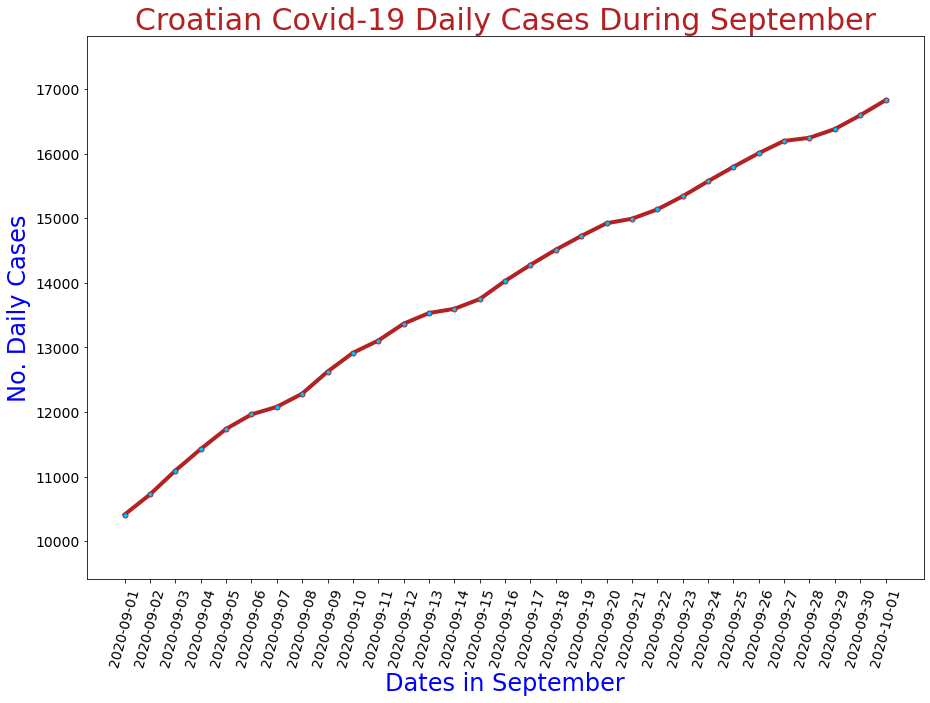

In [128]:
plt.figure(figsize=(15,10))
plt.plot(croatian_dates,croatian_cases,color= "firebrick", linewidth=4, marker="o", markersize=5, markerfacecolor="deepskyblue")
plt.title("Croatian Covid-19 Daily Cases During September", fontsize=30, color="firebrick")
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(min_croatian_cases-1000, max_croatian_cases+1000)
plt.xlabel('Dates in September', fontsize=24,color="blue")
plt.ylabel('No. Daily Cases', fontsize=24,color="blue")

plt.show()

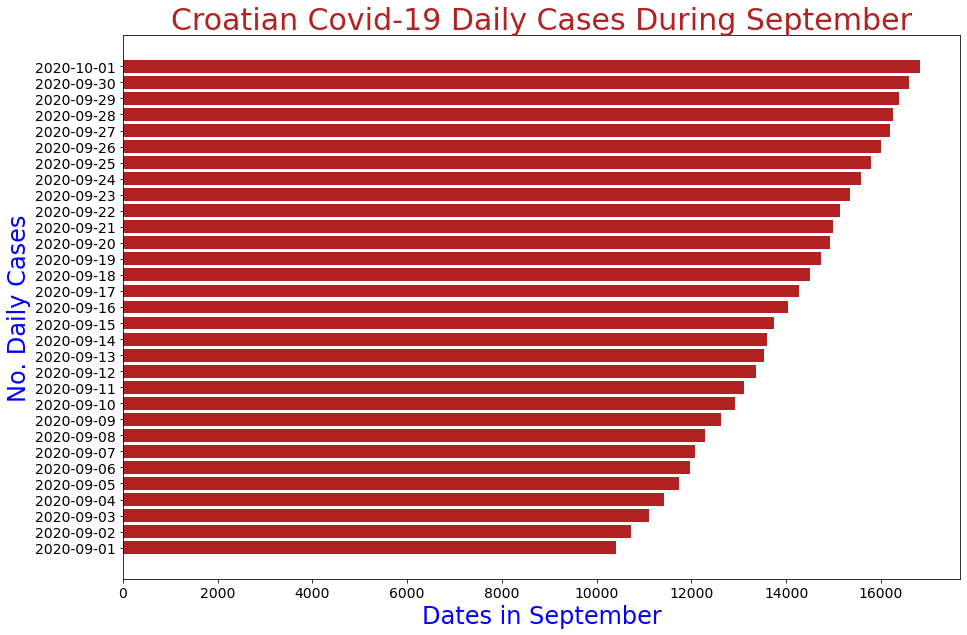

In [129]:
plt.figure(figsize=(15,10))
# set up the bar chart
plt.barh(croatian_dates, croatian_cases, align='center', color="firebrick")
plt.title("Croatian Covid-19 Daily Cases During September", fontsize=30, color="firebrick")
plt.xlabel('Dates in September', fontsize=24,color="blue")
plt.ylabel('No. Daily Cases', fontsize=24,color="blue")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.show()

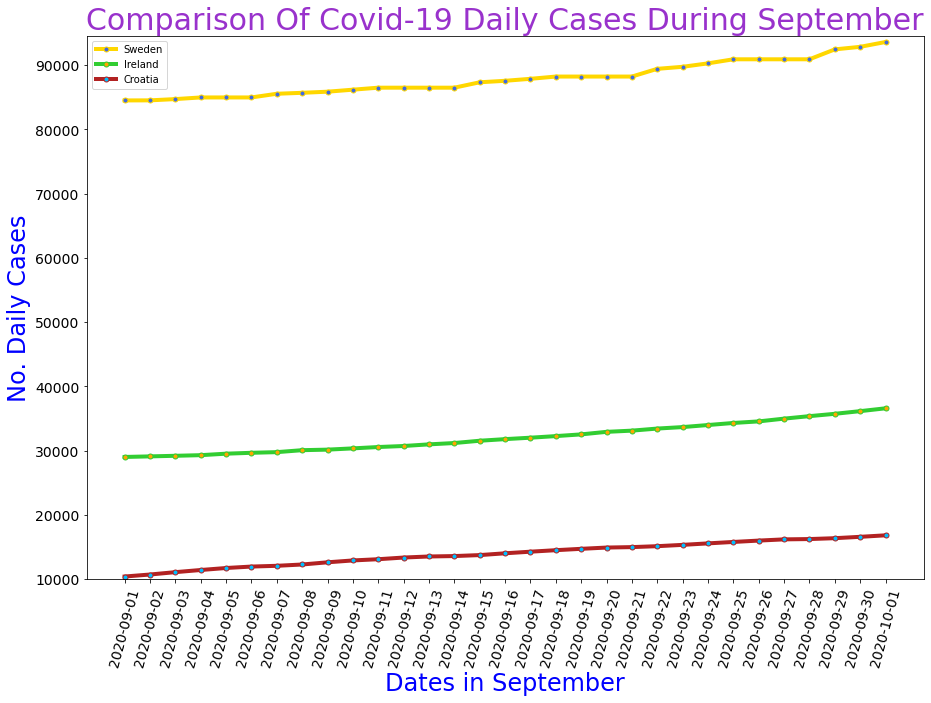

In [130]:
plt.figure(figsize=(15,10))
plt.plot(swedish_dates,swedish_cases,color= "gold", linewidth=4, marker="o", markersize=5, markerfacecolor="royalblue")
plt.plot(irish_dates,irish_cases,color= "limegreen", linewidth=4,marker="o", markersize=5, markerfacecolor="orange")
plt.plot(croatian_dates,croatian_cases,color= "firebrick", linewidth=4,  marker="o", markersize=5, markerfacecolor="deepskyblue")
plt.title("Comparison Of Covid-19 Daily Cases During September", fontsize=30, color="darkorchid")
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(lower_cases_limit, max_swedish_cases+1000)
plt.xlabel('Dates in September', fontsize=24,color="blue")
plt.ylabel('No. Daily Cases', fontsize=24,color="blue")

plt.gca().legend(("Sweden","Ireland","Croatia"))

plt.show()

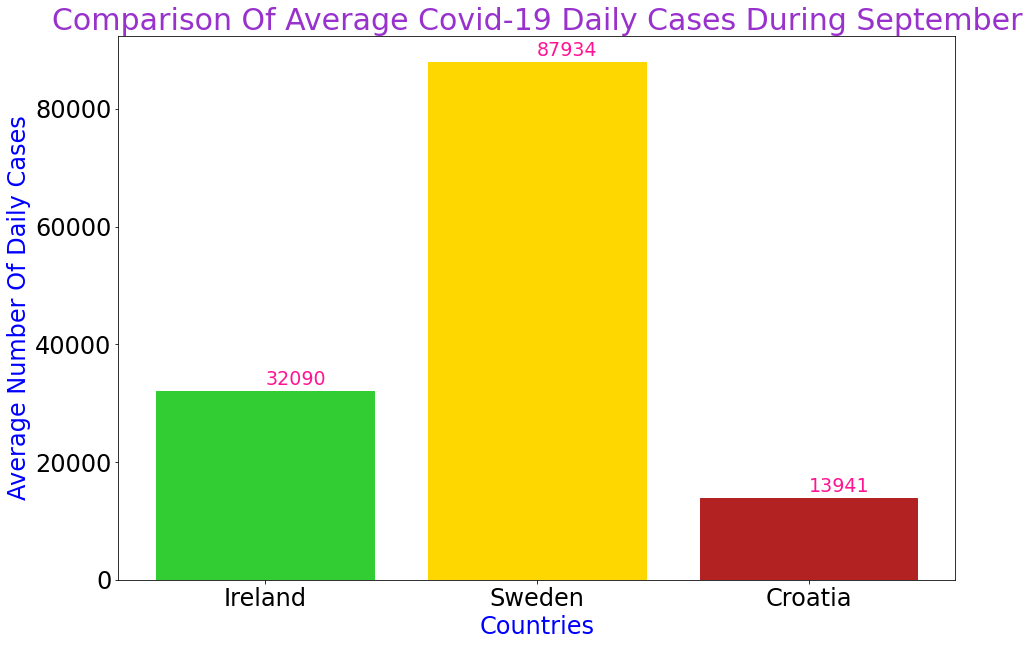

In [170]:
plt.figure(figsize=(15,10))
# set up the bar chart
barlist=plt.bar(countries, avg_cases)
plt.title("Comparison Of Average Covid-19 Daily Cases During September", fontsize=30, color="darkorchid")
barlist[0].set_color("limegreen")
barlist[1].set_color("gold")
barlist[2].set_color("firebrick")
plt.ylabel("Average Number Of Daily Cases", fontsize=24, color="blue")
plt.xlabel("Countries", fontsize=24, color="blue")
# increase the font sizes on the axes
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

for i in range(len(countries)):
    plt.annotate(int(avg_cases[i]), xy=(countries[i],avg_cases[i]+1000),fontsize=19,color="deeppink" )
   


plt.show()


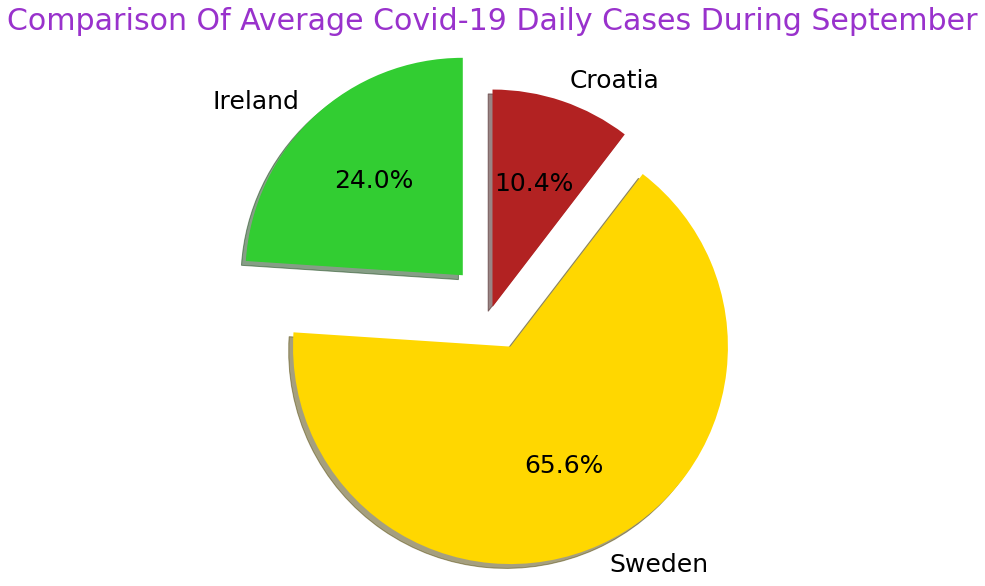

In [186]:
plt.figure(figsize=(10,10))
plt.title("Comparison Of Average Covid-19 Daily Cases During September", fontsize=30, color="darkorchid")
explode = (0.2, 0.2,0)
# create the pie chart on the sample data
p = plt.pie(avg_cases, explode=explode, labels=countries, colors=["limegreen","gold","firebrick"], autopct="%.1f%%",
           shadow=True, startangle=90,textprops={'fontsize': 25})
plt.show()

In [ ]:
#Face-to-face Ireland and Croatia